<a href="https://colab.research.google.com/github/Briskwoods/Machine-Learning-Groupwork-Task-1/blob/master/AI_CAT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, ElasticNet
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [2]:
cal_housing = fetch_california_housing()
data = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
target = pd.DataFrame(cal_housing.target)

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
null_columns = data.columns[data.isna().any()]
data[null_columns].isna().sum()

null_columns
#CHECKING FOR NULL VALUES

Index([], dtype='object')

In [11]:
#feature selection
def plot_corr(data, size = 10):
  corr = data.corr()
  fig, ax = plt.subplots(figsize = (size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

  plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

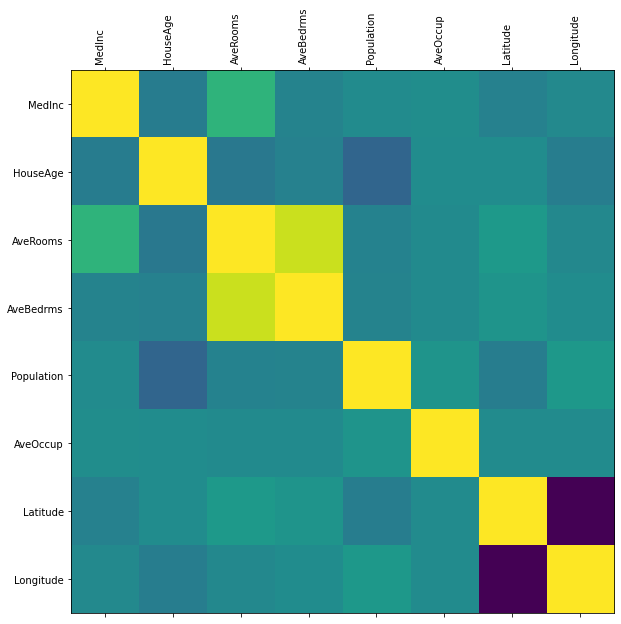

In [12]:
plot_corr(data)

In [13]:
# feature extraction using PCA
#sc = StandardScaler()
#data_standardized = sc.fit_transform(data)

In [50]:
X = data.copy()
y = target.copy()
X_ts = PowerTransformer().fit_transform(X)
y_ts = PowerTransformer().fit_transform(y)

In [52]:
pca_with_varia =PCA(0.9)
pca_with_varia.fit_transform(X_ts)
pca_with_varia.n_components_

6

In [56]:
pca = PCA(n_components = 6)
pc_s = pca.fit_transform(data_standardized)
pca_data = pd.DataFrame(pc_s, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
target_data = pd.DataFrame(y_ts, columns =['MedVal'])
final_data = pd.concat([pca_data, target_data],axis=1)
final_data

,PC1,PC2,PC3,PC4,PC5,PC6,MedVal
0,1.882704,-0.503362,-0.314134,-2.555093,0.128040,0.485177,1.715878
1,1.371120,-0.121406,1.905258,-1.872984,-0.267430,0.605123,1.281389
2,2.086868,-0.501136,-0.937245,-2.100133,0.370032,1.158676,1.247506
3,1.575801,-1.239495,-1.025957,-1.286721,0.318956,0.977902,1.188835
4,1.591206,-1.345264,-1.249171,-0.450778,0.293612,0.865664,1.193798
...,...,...,...,...,...,...,...
20635,1.386779,-1.296137,0.054262,1.063026,-0.163868,-0.738947,-1.414289
20636,1.875219,-0.671533,0.155700,0.644612,-0.208383,-1.262269,-1.433165
20637,1.402357,-1.096426,0.567135,1.090397,-0.326347,-1.052189,-1.160803
20638,1.542943,-1.059408,0.365472,0.968799,-0.323242,-1.121581,-1.293200


In [57]:
final_data_array = final_data.to_numpy()

In [58]:
all_features = list(final_data.columns)
all_features
X_2 = final_data.loc[:,all_features[0]:all_features[-2]].values
y_2 = final_data.loc[:,[all_features[-1]]].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2,test_size = 0.2, random_state=0)

In [60]:
result = {}
models = {'LinearRegression':linear_model.LinearRegression(),
          'Lasso':linear_model.Lasso(),
          'Ridge':linear_model.Ridge(),
          'ElasticNet':linear_model.ElasticNet()}

for i in models:
  models[i].fit(X_train,y_train)
  accuracy = models[i].score(X_test,y_test)
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge,ElasticNet
0,0.450899,-0.000208,0.450902,0.104735


In [61]:
kfold = KFold(n_splits=4)
for i in models:
  regressor = models[i]
  c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)
  accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge,ElasticNet
0,0.47891,-0.000059,0.478911,0.109949
